DỰ ÁN CUỐI KỲ - HỌC MÁY - NHÓM 19 - GV: LÊ ANH CƯỜNG

HỌ TÊN: 
- Nguyễn Minh Đăng Khoa - MSSV: 51800882
- Trần Ngọc Dũng - MSSV: 51800187

# TÊN DỮ LIỆU: Electric Production Data Set

LINK DỮ LIỆU: https://www.kaggle.com/kandij/electric-production

Mô tả: Dataset chỉ có 2 col, một cột là ngày tháng và cột còn lại liên quan đến phần trăm tiêu thụ. 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import seaborn as sns
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping

# Read Data

In [2]:
file_path = "./Electric_Production.csv"

In [3]:
# Chuyển đổi sang dạng yyyy/MM/dd và để DATE làm index
df = pd.read_csv(file_path, index_col="DATE", parse_dates=True)
print(df.shape)
df.tail()

(397, 1)


,Value
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [4]:
# kiểm tra có dòng nào null không?
print(df.isnull().sum())

Value    0
dtype: int64


<AxesSubplot:xlabel='DATE', ylabel='Value'>

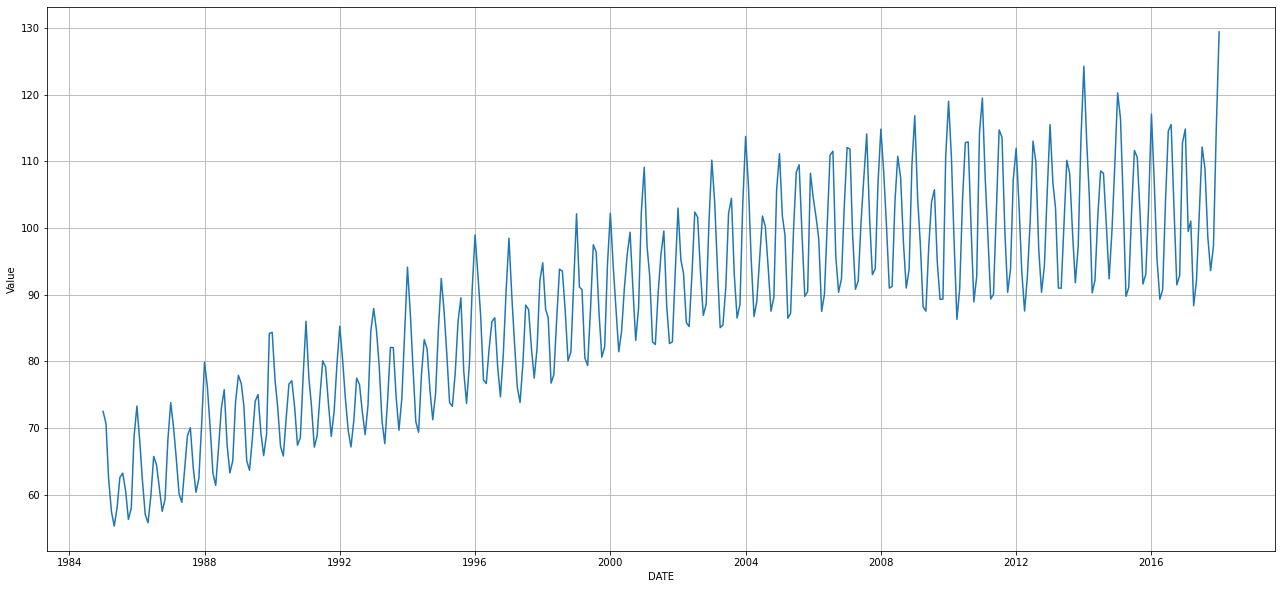

In [5]:
# Vẽ thể hiện Value qua từng tháng từ năm 1984 -> 2018
plt.figure(figsize=(22,10))
plt.grid()
sns.lineplot(x=df.index, y='Value', data=df)

# Preprocessing

In [6]:
# Chuyển đổi Value thành mảng numpy
dataset = df.values

In [7]:
# Đổi sang dạng float
dataset = dataset.astype("float32")

In [8]:
# Chuẩn hóa dataset
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [9]:
# không thể sử dụng cách ngẫu nhiên để tách tập dữ liệu thành huấn luyện và kiểm tra 
# vì chuỗi sự kiện rất quan trọng đối với chuỗi thời gian
# Tách 80% dataset làm train và 20% còn lại làm test
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [10]:
# print(train)

In [11]:
# chuyển đổi mảng giá trị thành một ma trận tập dữ liệu 
# trong đó X là số lượng % điện tiêu thụ tại một thời điểm nhất định (t, t-1, t-2,...)
# Y là số lượng % điện tiêu thụ tại thời thời điểm tiếp theo (t + 1)
def create_dataset(dataset, seq_size=1):
    dataX, dataY = [], []
    
    for i in range(len(dataset) - seq_size - 1):
        window = dataset[i:(i + seq_size), 0]
        dataX.append(window)
        dataY.append(dataset[i + seq_size, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
seq_size = 3 # Số timesteps
X_train, y_train = create_dataset(train, seq_size)
X_test, y_test = create_dataset(test, seq_size)

In [21]:
# print(train)

In [22]:
# print(X_train)

In [23]:
# print(y_train)

# Feed Forward Neural Networks

# MODEL 1

In [24]:
model_FFNN_1 = Sequential()
model_FFNN_1.add(Dense(64, input_dim=seq_size, activation="sigmoid"))
model_FFNN_1.add(Dense(1)) # kết quả đầu ra chỉ có 1 là Y (giá trị tiếp theo)
model_FFNN_1.compile(loss="mean_squared_error", optimizer="adam")
model_FFNN_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [25]:
earlyStopping = EarlyStopping(monitor='loss', patience=3)

In [56]:
EPOCHS = 100
BATCH_SIZE = 64

history_FFNN_1 = model_FFNN_1.fit(X_train, y_train,
                            epochs=EPOCHS,
                            batch_size=BATCH_SIZE,
                            callbacks=[earlyStopping],
                            validation_data=(X_test, y_test),
                            verbose=2)

Epoch 1/100
5/5 - 0s - loss: 0.0074 - val_loss: 0.0123
Epoch 2/100
5/5 - 0s - loss: 0.0075 - val_loss: 0.0119
Epoch 3/100
5/5 - 0s - loss: 0.0074 - val_loss: 0.0126
Epoch 4/100
5/5 - 0s - loss: 0.0074 - val_loss: 0.0132
Epoch 5/100
5/5 - 0s - loss: 0.0074 - val_loss: 0.0124
Epoch 6/100
5/5 - 0s - loss: 0.0074 - val_loss: 0.0122
Epoch 7/100
5/5 - 0s - loss: 0.0074 - val_loss: 0.0122
Epoch 8/100
5/5 - 0s - loss: 0.0074 - val_loss: 0.0123
Epoch 9/100
5/5 - 0s - loss: 0.0073 - val_loss: 0.0126
Epoch 10/100
5/5 - 0s - loss: 0.0074 - val_loss: 0.0126
Epoch 11/100
5/5 - 0s - loss: 0.0073 - val_loss: 0.0123
Epoch 12/100
5/5 - 0s - loss: 0.0074 - val_loss: 0.0120
Epoch 13/100
5/5 - 0s - loss: 0.0073 - val_loss: 0.0125
Epoch 14/100
5/5 - 0s - loss: 0.0073 - val_loss: 0.0126
Epoch 15/100
5/5 - 0s - loss: 0.0073 - val_loss: 0.0121
Epoch 16/100
5/5 - 0s - loss: 0.0073 - val_loss: 0.0122
Epoch 17/100
5/5 - 0s - loss: 0.0073 - val_loss: 0.0123
Epoch 18/100
5/5 - 0s - loss: 0.0073 - val_loss: 0.0123
E

# PLOT

In [43]:
def plotModelLoss(loss, val_loss, title):
    plt.figure(figsize=(22, 10))
    plt.plot(loss, label="loss")
    plt.plot(val_loss, label="val_loss")
    plt.grid()
    plt.legend()
    plt.title(title)

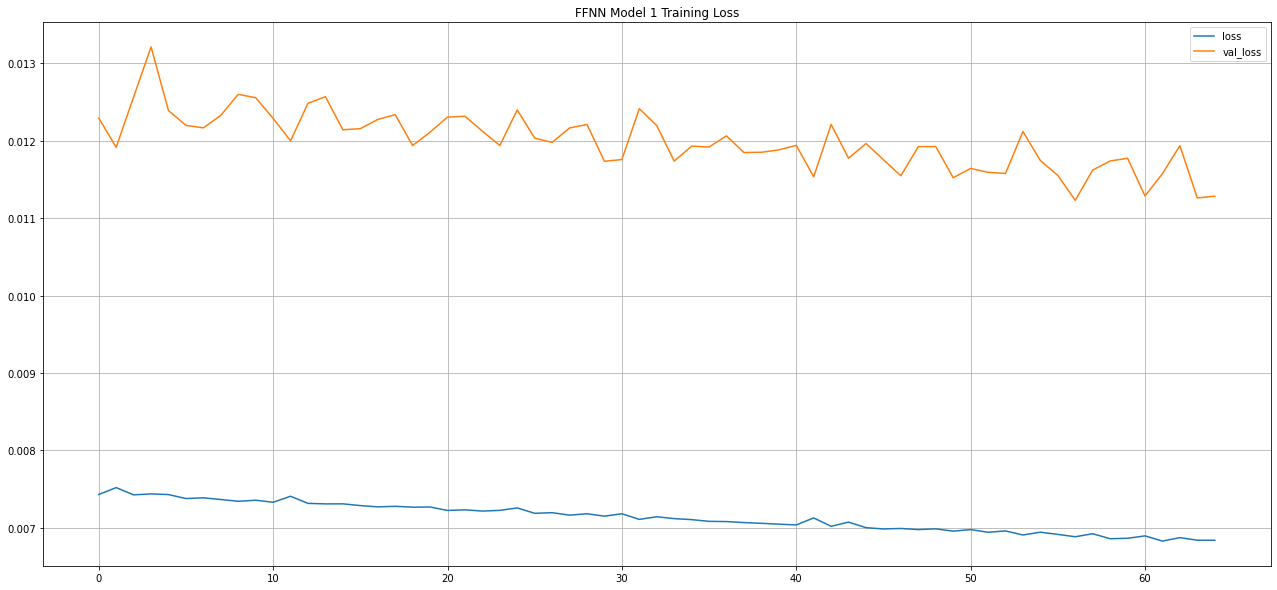

In [57]:
plotModelLoss(history_FFNN_1.history['loss'], history_FFNN_1.history['val_loss'], "FFNN Model 1 Training Loss")

# PREDICT

In [73]:
def predictionAndPlot(model, X_train, X_test, dfTrainPredict, dfTestPredict):
    # make predictions
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)
    
    # Trước đó đã dùng minmaxscaler nên giờ đảo ngược nó lại
    trainPredict = scaler.inverse_transform(trainPredict)
    testPredict = scaler.inverse_transform(testPredict)
    
    # Căn chỉnh lại để có thể so sánh dataset
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[seq_size:len(trainPredict) + seq_size, :] = trainPredict
    
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict
    
    df[dfTrainPredict] = trainPredictPlot
    df[dfTestPredict] = testPredictPlot

    # Vẽ train, test so sánh với dataset
    plt.figure(figsize=(20,10))
    plt.plot(df.Value, label="data", alpha=0.7)
    plt.plot(df[dfTrainPredict], label="train")
    plt.plot(df[dfTestPredict], label="test")
    plt.ylabel("Value")
    plt.xlabel("Date")
    plt.legend()
    plt.grid()
    plt.show()

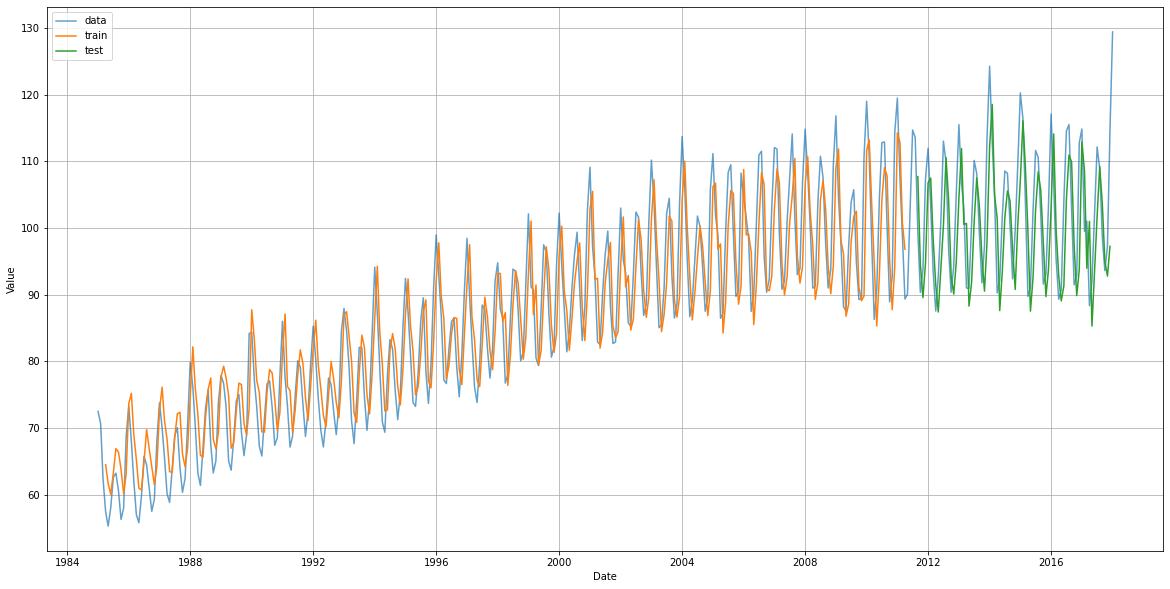

In [74]:
predictionAndPlot(model_FFNN_1, X_train, X_test, "trainPredict_FFNN_1", "testPredict_FFNN_1")

# MODEL 2

In [57]:
model_FFNN_2 = Sequential()
model_FFNN_2.add(Dense(64, input_dim=seq_size, activation="relu"))
model_FFNN_2.add(Dense(32, activation="relu"))
model_FFNN_2.add(Dense(1))
model_FFNN_2.compile(loss="mean_squared_error", optimizer="adam")
model_FFNN_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________


In [58]:
EPOCHS = 30
BATCH_SIZE = 32

history_FFNN_2 = model_FFNN_2.fit(X_train, y_train,
                            epochs=EPOCHS,
                            batch_size=BATCH_SIZE,
                            callbacks=[earlyStopping],
                            validation_data=(X_test, y_test),
                            verbose=2)

Epoch 1/30
10/10 - 1s - loss: 0.1387 - val_loss: 0.1299
Epoch 2/30
10/10 - 0s - loss: 0.0323 - val_loss: 0.0246
Epoch 3/30
10/10 - 0s - loss: 0.0180 - val_loss: 0.0211
Epoch 4/30
10/10 - 0s - loss: 0.0154 - val_loss: 0.0187
Epoch 5/30
10/10 - 0s - loss: 0.0121 - val_loss: 0.0200
Epoch 6/30
10/10 - 0s - loss: 0.0110 - val_loss: 0.0156
Epoch 7/30
10/10 - 0s - loss: 0.0099 - val_loss: 0.0144
Epoch 8/30
10/10 - 0s - loss: 0.0090 - val_loss: 0.0140
Epoch 9/30
10/10 - 0s - loss: 0.0083 - val_loss: 0.0125
Epoch 10/30
10/10 - 0s - loss: 0.0078 - val_loss: 0.0125
Epoch 11/30
10/10 - 0s - loss: 0.0073 - val_loss: 0.0113
Epoch 12/30
10/10 - 0s - loss: 0.0068 - val_loss: 0.0105
Epoch 13/30
10/10 - 0s - loss: 0.0063 - val_loss: 0.0095
Epoch 14/30
10/10 - 0s - loss: 0.0059 - val_loss: 0.0092
Epoch 15/30
10/10 - 0s - loss: 0.0056 - val_loss: 0.0083
Epoch 16/30
10/10 - 0s - loss: 0.0054 - val_loss: 0.0098
Epoch 17/30
10/10 - 0s - loss: 0.0050 - val_loss: 0.0077
Epoch 18/30
10/10 - 0s - loss: 0.0048 - 

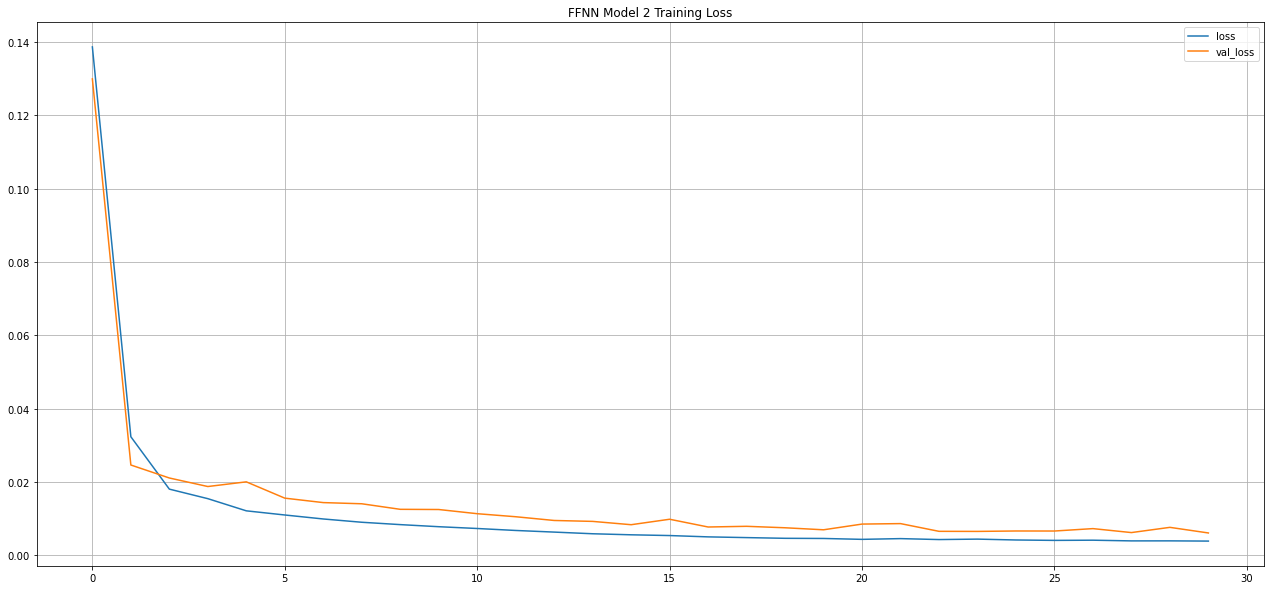

In [59]:
plotModelLoss(history_FFNN_2.history['loss'], history_FFNN_2.history['val_loss'], "FFNN Model 2 Training Loss")

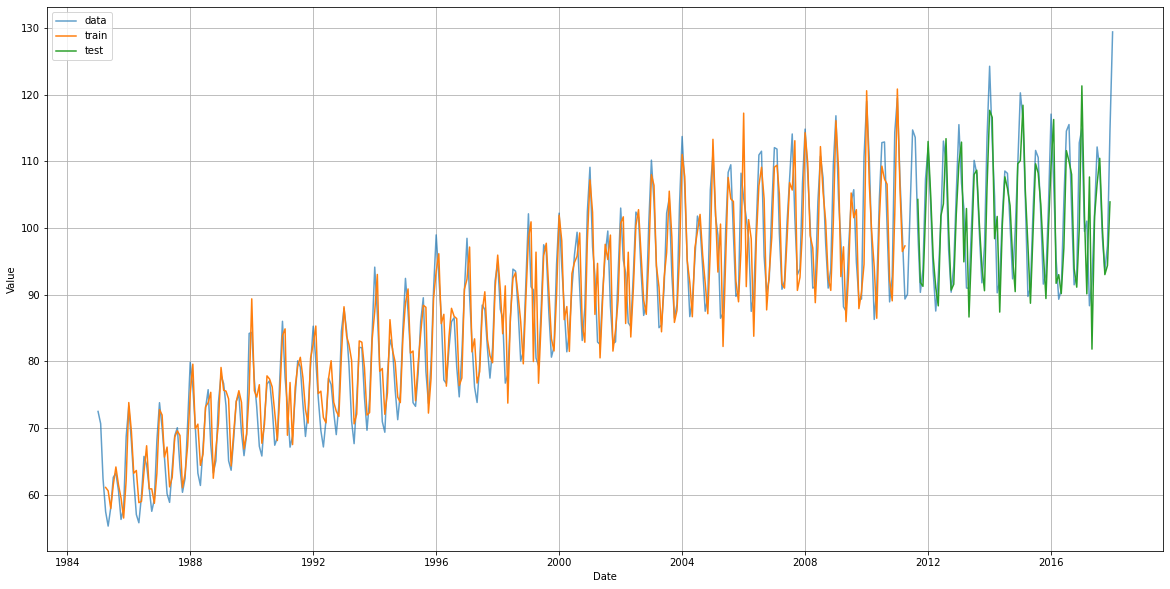

In [93]:
predictionAndPlot(model_FFNN_2, X_train, X_test, "trainPredict_FFNN_2", "testPredict_FFNN_2")

# LSTM

# Preprocessing

In [75]:
# reshape input to be [samples, time steps, features]
X_train_LSTM = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_LSTM = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [76]:
print(X_train_LSTM.shape, X_test_LSTM.shape)

(313, 1, 3) (76, 1, 3)


# Model 1

In [78]:
# create and fit the LSTM network
model_LSTM_1 = Sequential()
model_LSTM_1.add(LSTM(64, input_shape=(None, seq_size)))
model_LSTM_1.add(Dense(32))
model_LSTM_1.add(Dense(1))
model_LSTM_1.compile(loss='mean_squared_error', optimizer='adam')
model_LSTM_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                17408     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 19,521
Trainable params: 19,521
Non-trainable params: 0
_________________________________________________________________


In [102]:
EPOCHS = 30
BATCH_SIZE = 64


history_LSTM_1 = model_LSTM_1.fit(X_train_LSTM, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_test_LSTM, y_test),
                    callbacks=[earlyStopping],
                    verbose=2)


Epoch 1/30
5/5 - 0s - loss: 0.0045 - val_loss: 0.0080
Epoch 2/30
5/5 - 0s - loss: 0.0046 - val_loss: 0.0074
Epoch 3/30
5/5 - 0s - loss: 0.0045 - val_loss: 0.0078
Epoch 4/30
5/5 - 0s - loss: 0.0045 - val_loss: 0.0075


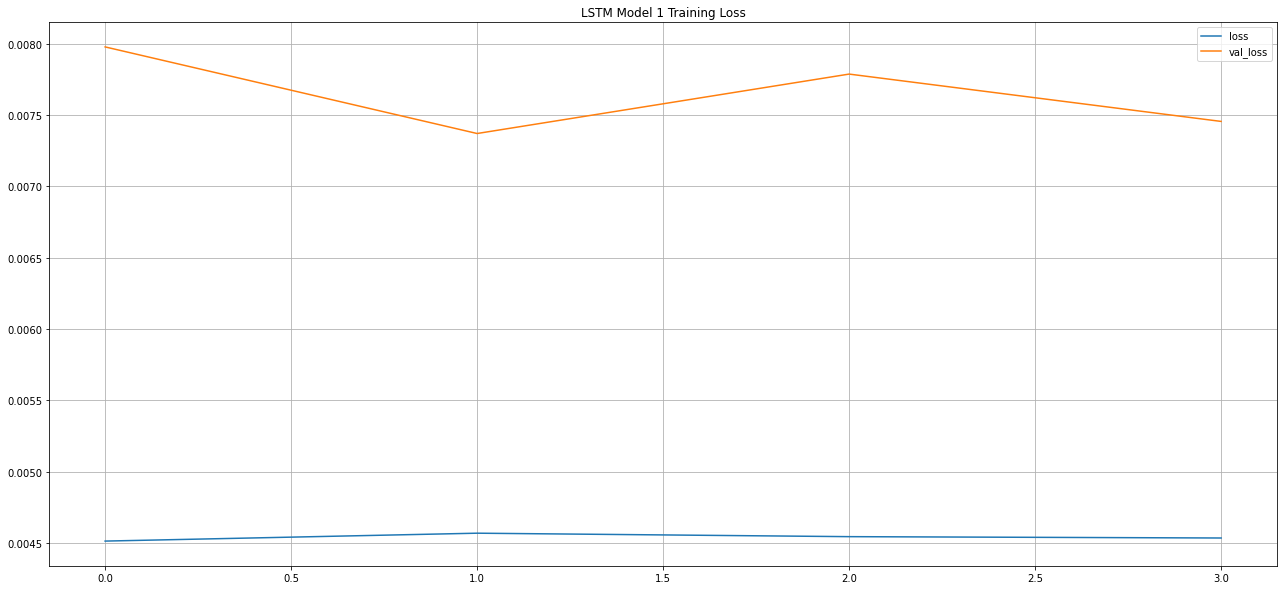

In [103]:
plotModelLoss(history_LSTM_1.history['loss'], history_LSTM_1.history['val_loss'], "LSTM Model 1 Training Loss")

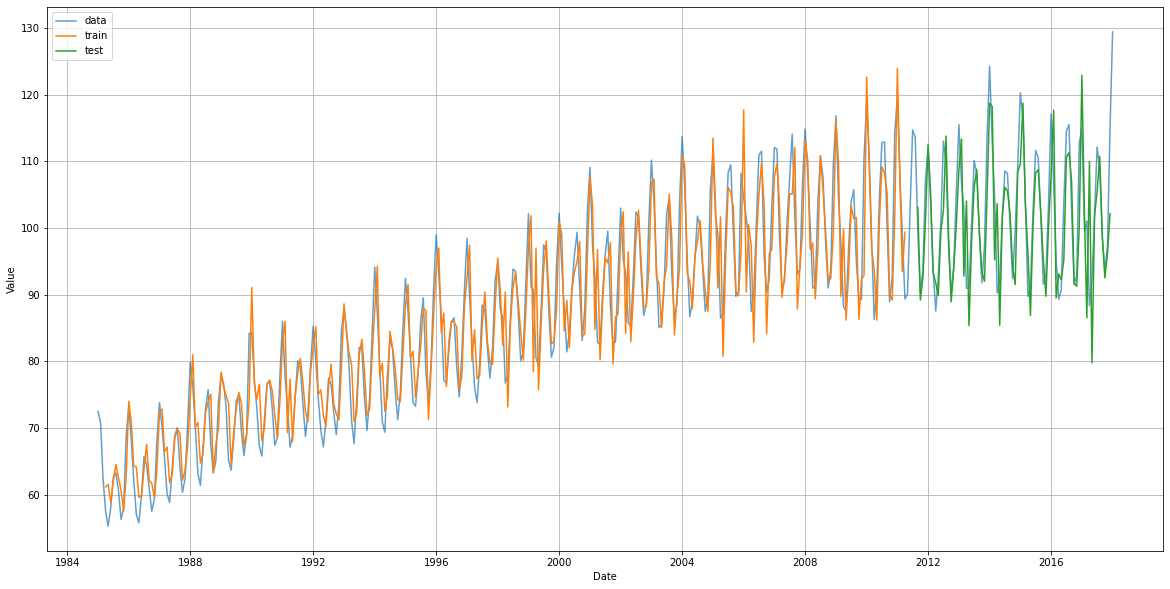

In [104]:
predictionAndPlot(model_LSTM_1, X_train_LSTM, X_test_LSTM, "trainPredict_LSTM_1", "testPredict_LSTM_1")

# MODEL 2

In [105]:
model_LSTM_2 = Sequential()
model_LSTM_2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(None, seq_size)))
model_LSTM_2.add(LSTM(50, activation='relu'))
model_LSTM_2.add(Dense(32))
model_LSTM_2.add(Dense(1))
model_LSTM_2.compile(loss='mean_squared_error', optimizer='adam')
model_LSTM_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 50)          10800     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1632      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 32,665
Trainable params: 32,665
Non-trainable params: 0
_________________________________________________________________


In [106]:
EPOCHS1 = 100
BATCH_SIZE1 = 32

history_LSTM_2 = model_LSTM_2.fit(X_train_LSTM, y_train,
                    epochs=EPOCHS1,
                    batch_size=BATCH_SIZE1,
                    validation_data=(X_test_LSTM, y_test),
                    callbacks=[earlyStopping],
                    verbose=2
                   )

Epoch 1/100
10/10 - 3s - loss: 0.1738 - val_loss: 0.2953
Epoch 2/100
10/10 - 0s - loss: 0.1036 - val_loss: 0.1772
Epoch 3/100
10/10 - 0s - loss: 0.0532 - val_loss: 0.0779
Epoch 4/100
10/10 - 0s - loss: 0.0331 - val_loss: 0.0306
Epoch 5/100
10/10 - 0s - loss: 0.0327 - val_loss: 0.0313
Epoch 6/100
10/10 - 0s - loss: 0.0294 - val_loss: 0.0448
Epoch 7/100
10/10 - 0s - loss: 0.0276 - val_loss: 0.0435
Epoch 8/100
10/10 - 0s - loss: 0.0255 - val_loss: 0.0320
Epoch 9/100
10/10 - 0s - loss: 0.0231 - val_loss: 0.0283
Epoch 10/100
10/10 - 0s - loss: 0.0208 - val_loss: 0.0266
Epoch 11/100
10/10 - 0s - loss: 0.0186 - val_loss: 0.0255
Epoch 12/100
10/10 - 0s - loss: 0.0168 - val_loss: 0.0243
Epoch 13/100
10/10 - 0s - loss: 0.0154 - val_loss: 0.0231
Epoch 14/100
10/10 - 0s - loss: 0.0145 - val_loss: 0.0228
Epoch 15/100
10/10 - 0s - loss: 0.0139 - val_loss: 0.0220
Epoch 16/100
10/10 - 0s - loss: 0.0133 - val_loss: 0.0224
Epoch 17/100
10/10 - 0s - loss: 0.0131 - val_loss: 0.0210
Epoch 18/100
10/10 - 0s

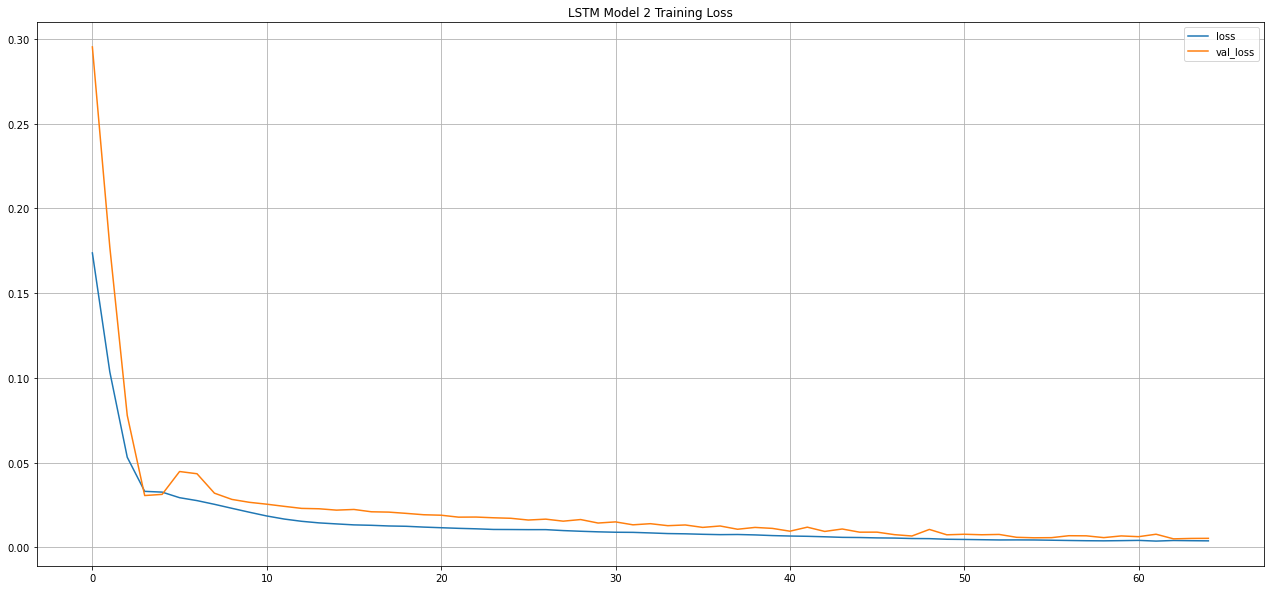

In [107]:
plotModelLoss(history_LSTM_2.history['loss'], history_LSTM_2.history['val_loss'], "LSTM Model 2 Training Loss")

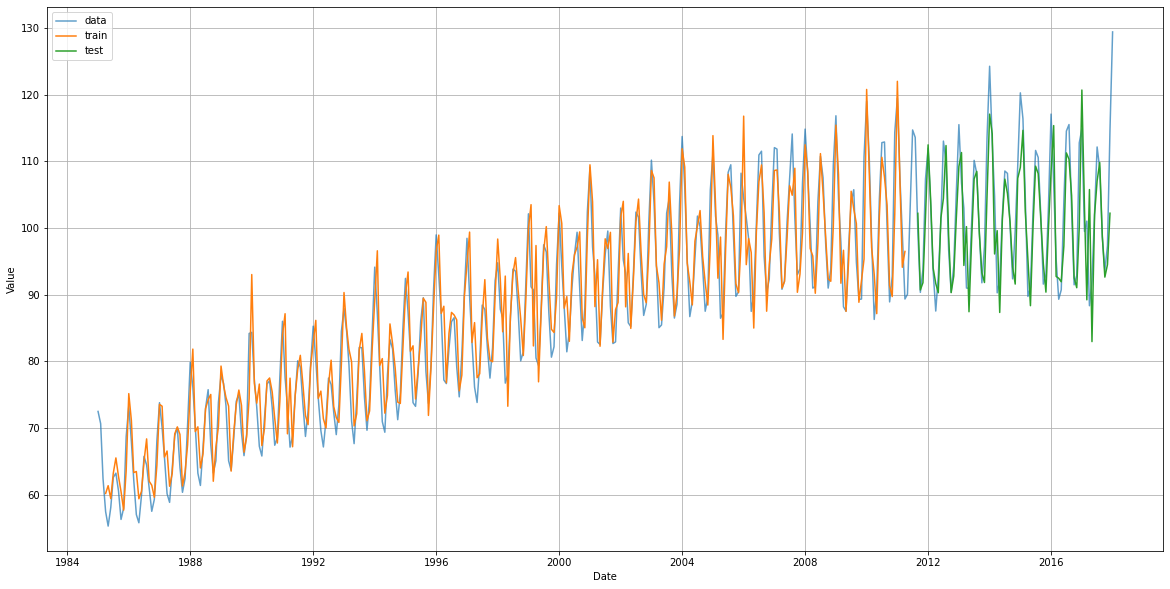

In [108]:
predictionAndPlot(model_LSTM_2, X_train_LSTM, X_test_LSTM, "trainPredict_LSTM_2", "testPredict_LSTM_2")